In [30]:
import os
import fitsio
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from schechter import schechter, named_schechter

In [31]:
fpath = os.environ['CSCRATCH'] + '/norberg/GAMA4/gama_gold_ddp_n8.fits'

dat = fitsio.read(fpath)
dat = Table(dat)

In [46]:
dat['PHI'] = named_schechter(dat['MCOLOR_0P0'], named_type='TMR', zz=None, evolve=False)
# (rho - rho_bar) / rho
dat['RHO_DDP1'] = dat['DDP1_N8'] / ( (4./3) * np.pi * 8.**3 )
dat['RHO_DDP2'] = dat['DDP2_N8'] / ( (4./3) * np.pi * 8.**3 )
dat['RHO_DDP3'] = dat['DDP3_N8'] / ( (4./3) * np.pi * 8.**3 )

rho_bar_DDP1 = 0.005383528919866882 #len(DDP1) / area_DDP1
rho_bar_DDP2 = 0.009928035902084674 #len(DDP2) / area_DDP2
rho_bar_DDP3 = 0.018396185892331243 #len(DDP3) / area_DDP3

dat['DELTA8_DDP1'] = ((dat['RHO_DDP1'] - rho_bar_DDP1) / dat['RHO_DDP1'])
dat['DELTA8_DDP2'] = ((dat['RHO_DDP2'] - rho_bar_DDP2) / dat['RHO_DDP2'])
dat['DELTA8_DDP3'] = ((dat['RHO_DDP3'] - rho_bar_DDP3) / dat['RHO_DDP3'])

<ipython-input-46-112116fd97b9>:11: RuntimeWarning: divide by zero encountered in true_divide
  dat['DELTA8_DDP1'] = ((dat['RHO_DDP1'] - rho_bar_DDP1) / dat['RHO_DDP1'])
<ipython-input-46-112116fd97b9>:12: RuntimeWarning: divide by zero encountered in true_divide
  dat['DELTA8_DDP2'] = ((dat['RHO_DDP2'] - rho_bar_DDP2) / dat['RHO_DDP2'])
<ipython-input-46-112116fd97b9>:13: RuntimeWarning: divide by zero encountered in true_divide
  dat['DELTA8_DDP3'] = ((dat['RHO_DDP3'] - rho_bar_DDP3) / dat['RHO_DDP3'])


In [55]:
(dat['RHO_DDP1'] - rho_bar_DDP1)

-0.004450980425187807
-0.004917254672527345
-0.004917254672527345
-0.004917254672527345
-0.004450980425187807
-0.004450980425187807
-0.0035184319305087332
-0.004917254672527345
-0.004917254672527345
-0.005383528919866882
-0.0035184319305087332


In [47]:
DDP1 = dat[dat['DDP'][:,0] == 1]
DDP2 = dat[dat['DDP'][:,1] == 1]
DDP3 = dat[dat['DDP'][:,2] == 1]

(array([684.,   0.,   0.,   0.,   0., 440.,   0., 244., 165.,  44.]),
 array([-10.54584228,  -9.50671648,  -8.46759067,  -7.42846487,
         -6.38933906,  -5.35021326,  -4.31108745,  -3.27196164,
         -2.23283584,  -1.19371003,  -0.15458423]),
 <a list of 10 Patch objects>)

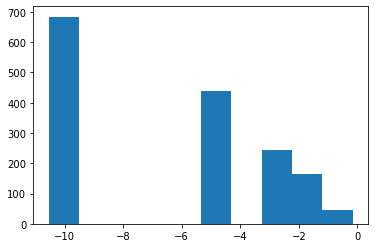

In [51]:
plt.hist(DDP1['DELTA8_DDP1'])

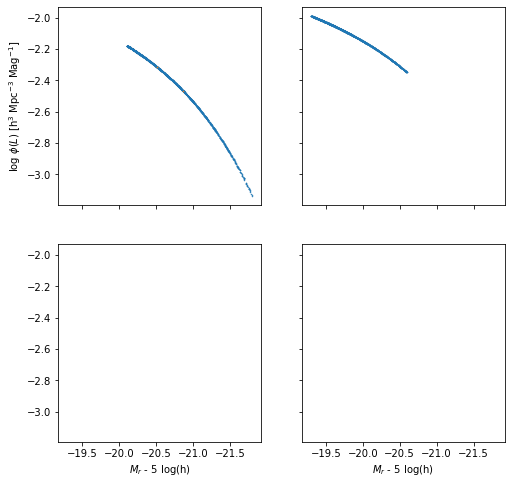

In [50]:
fig, ax = plt.subplots(2, 2, figsize=(8,8), sharex=True, sharey=True)
ax[0,0].scatter(DDP1[DDP1['DELTA8_DDP1'] < -0.75]['MCOLOR_0P0'], np.log10(DDP1[DDP1['DELTA8_DDP1'] < -0.75]['PHI']), s=0.25)
ax[0,0].scatter(DDP1[(DDP1['DELTA8_DDP1'] < -0) & (DDP1['DELTA8_DDP1'] > -0.4)]['MCOLOR_0P0'], np.log10(DDP1[(DDP1['DELTA8_DDP1'] < -0) & (DDP1['DELTA8_DDP1'] > -0.4)]['PHI']), s=0.25)



ax[0,1].scatter(DDP2['MCOLOR_0P0'], np.log10(DDP2['PHI']), s=0.25)

ax[1,0].set_xlabel(r'$M_r$ - 5 log(h)')
ax[1,1].set_xlabel(r'$M_r$ - 5 log(h)')
ax[0,0].set_ylabel(r'log $\phi(L)$ [h$^3$ Mpc$^{-3}$ Mag$^{-1}$]')

plt.gca().invert_xaxis()

In [10]:
zlims = {'DDP1_ZMIN': 0.039069999009370804,\
         'DDP1_ZMAX': 0.2483299970626831,\
         'DDP1_VZ': 6451530.309761727,\
         'DDP1_DENS': 0.005383528919866882,\
         'DDP2_ZMIN': 0.03914999961853027,\
         'DDP2_ZMAX': 0.18308000266551971,\
         'DDP2_VZ': 2679079.7557868413,\
         'DDP2_DENS': 0.009928035902084674,\
         'DDP3_ZMIN': 0.03903000056743622,\
         'DDP3_ZMAX': 0.09973999857902527,\
         'DDP3_VZ': 432372.2344703941,\
         'DDP3_DENS': 0.018396185892331243}